# Maestría en Ciencia de Datos - Fundamentos de Analítica II
## Daniel Martínez Villegas - Felipe Montenegro Fuentes 
### Taller III

In [1]:
# Carga de librerías

#!pip install pmdarima
from pmdarima.arima import auto_arima
from pmdarima.utils import acf,pacf
from pmdarima.arima import ARIMA
import pandas as pd
import numpy as np
from statsmodels.sandbox.stats.runs import runstest_1samp # prueba de rachas de Wald y Wolfowitz
import statsmodels.api as sm # prueba de Box-Pierce y la modificación de Ljung-Box
from matplotlib import pyplot as plt # gráficos
import pylab as py
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

## **1. Lectura de la información**

In [2]:
data = pd.read_excel("datosEmpleo.xlsx",index_col='mes',parse_dates=True)
data.head()

,TD_13ciudades,Ocupados,Desocupados,Inactivos
mes,,,,
2001-01-01,20.946380,6923.604,1834.507,4600.718
2001-02-01,19.894213,7037.746,1747.820,4596.805
2001-03-01,19.221565,6945.973,1652.823,4807.120
2001-04-01,17.888575,6973.079,1519.137,4937.280
2001-05-01,17.945654,6994.462,1529.720,4928.911


## **2. Identificación del comportamiento de las Funciones de Autocorrelación**

El objetivo es poder analizar el comportamiento de las Funciones de Autocorrelación para previamente tener un indicio de los parámetros del modelo a utilizar. 

In [3]:
#Función de Autocorrelación

acf(data['Ocupados'],40)

array([1.        , 0.97923589, 0.96362413, 0.95086793, 0.94043553,
       0.92969259, 0.91713405, 0.90706034, 0.89397301, 0.88399232,
       0.87530735, 0.87098372, 0.86597826, 0.84721366, 0.83017347,
       0.81678605, 0.80762818, 0.79697425, 0.78407137, 0.7731639 ,
       0.7600653 , 0.74812334, 0.74003564, 0.73382138, 0.72802239,
       0.71034489, 0.69224206, 0.67747509, 0.66521217, 0.65359545,
       0.63806496, 0.62512757, 0.61192566, 0.60000466, 0.59141481,
       0.58454874, 0.57785757, 0.55818054, 0.54021702, 0.52497098,
       0.51302032])

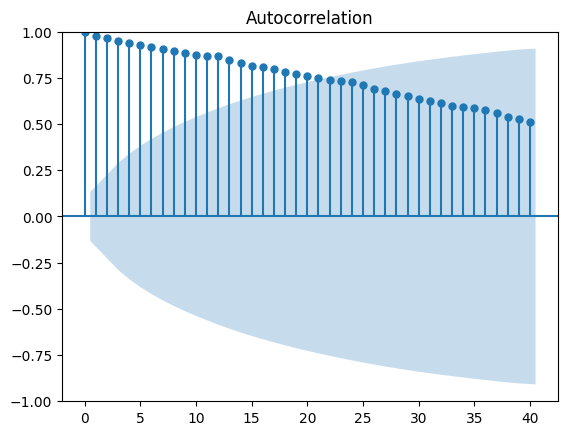

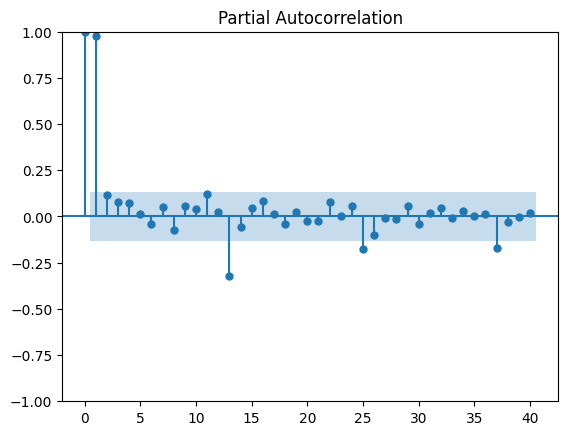

In [5]:
#Gráficas de ACF y PACF

plot_acf(data['Ocupados'],lags=40);
plot_pacf(data['Ocupados'],lags=40);

Teniendo en cuenta los gráficos anteriores, se observa que en la **ACF** el comportamiento de la autocorrelación disminuye de forma gradual pero no es un comportamiento muy acelerado, es decir que, es posible que no nos estemos enfrentando a una serie estacionaria. Por tanto, es necesario diferenciar. 



## **3. Protocolo de Evaluación (Split)**

In [6]:
train_socupados = data[["Ocupados"]][:len(data)-6] #Se está tomando todos los datos menos los 6 últimos
test_socupados = data[["Ocupados"]][len(data)-6:len(data)] #Se están tomando los restantes

## **4. AUTOARIMA**

Usamos este método para identificar los mejores parámetros del modelo.

In [8]:
model = auto_arima(train_socupados, 
                   max_p=10, 
                   max_q=10, 
                   information_criterion='aic', 
                   trace=True, 
                   error_action='ignore',  
                   suppress_warnings=True,
                   stepwise=True,
                   seasonal=False) 
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2839.801, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2830.184, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2821.028, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2839.858, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2800.549, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2801.991, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2802.110, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2803.646, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2824.594, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2818.369, Time=0.04 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.293 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1396.275
Date:                Mon, 19 Aug 2024   AIC                           2800.549
Time:                        12:40:45   BIC                           2813.994
Sample:                    01-01-2001   HQIC                          2805.983
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.3396      2.394      4.320      0.000       5.648      15.031
ar.L1          0.4455      0.096      4.657      0.000       0.258       0.633
ma.L1         -0.8728      0.048    -18.170      0.000      -0.967      -0.779
sigma2      2.871e+04   2475.311     11.598      0.000    2.39e+04    3.36e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                48.07
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                            -0.93
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
print(len(test_socupados))

6


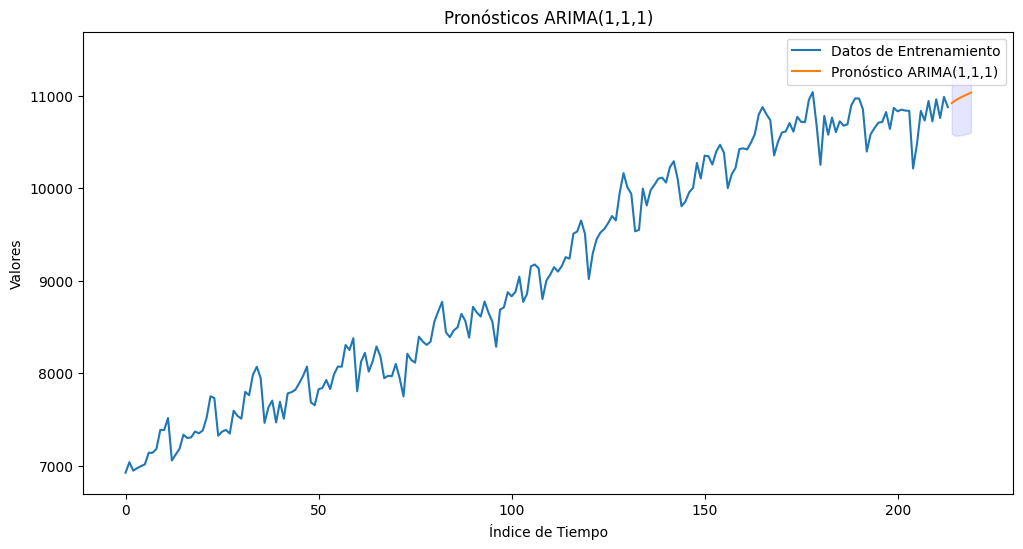

In [10]:
# Horizonte de predicción
h = len(test_socupados)  

# Realizar las predicciones
y_forec, conf_int = model.predict(h, return_conf_int=True, alpha=0.05)

# Preparar DataFrame para predicciones y intervalos de confianza
preds = pd.DataFrame(np.column_stack([y_forec, conf_int[:, 0], conf_int[:, 1]]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']

# Preparar el eje X para las predicciones
x_for = np.linspace(len(train_socupados) + 1, len(train_socupados) + h, h)

# Graficar
fig = plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(train_socupados)), train_socupados, label="Datos de Entrenamiento")
plt.plot(np.arange(len(train_socupados), len(train_socupados) + h), y_forec, label="Pronóstico ARIMA(1,1,1)")
plt.fill_between(np.arange(len(train_socupados), len(train_socupados) + h), conf_int[:, 0], conf_int[:, 1], color='blue', alpha=0.1)
plt.legend()
plt.xlabel("Índice de Tiempo")
plt.ylabel("Valores")
plt.title("Pronósticos ARIMA(1,1,1)")
plt.show()


In [21]:

# Realizar predicciones usando el modelo ajustado
n_periods = len(test_socupados)  # Númeor de periodos a predecir
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True, alpha=0.05)

# Asegurarse de que forecast sea unidimensional
forecast = np.ravel(forecast)

# Asegurarse de que test_socupados.values sea unidimensional
test_socupados_values = np.ravel(test_socupados.values)

# Crear un DataFrame para comparar predicciones con los valores reales
predicted_vs_actual = pd.DataFrame({
    'Predicción': forecast,
    'Datos Reales': test_socupados_values
}, index=test_socupados.index)

# Imprimir la comparación
print(predicted_vs_actual)

              Predicción  Datos Reales
mes                                   
2018-11-01  10918.120064     10783.299
2018-12-01  10947.966806     10835.398
2019-01-01  10971.604668     10314.438
2019-02-01  10992.476163     10557.917
2019-03-01  11012.115104     10760.776
2019-04-01  11031.204881     10632.028


Realizamos el cálculo del RMSE del mejor modelo que fue identificado utilizando el método AUTOARIMA

In [23]:
rmse = np.sqrt(np.mean((test_socupados_values - forecast) ** 2))

print(f'RMSE: {rmse}')

RMSE: 381.6786776515465


## **5. Evaluación del Modelo - Datos Completos**

Teniendo en cuenta que logramos identificar cuál es el mejor modelo en los pasos anteriores, procedemos a realizar las predicciones usando todos los datos.

In [24]:
model = ARIMA(order=(1,1,1))
results = model.fit( data["Ocupados"])
results.summary()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  220
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1439.368
Date:                Mon, 19 Aug 2024   AIC                           2886.736
Time:                        13:18:22   BIC                           2900.292
Sample:                    01-01-2001   HQIC                          2892.211
                         - 04-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.8034      2.519      3.892      0.000       4.866      14.740
ar.L1          0.4417      0.103      4.285      0.000       0.240       0.644
ma.L1         -0.8600      0.054    -15.921      0.000      -0.966      -0.754
sigma2      2.973e+04   2523.647     11.779      0.000    2.48e+04    3.47e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                55.64
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.98
Prob(H) (two-sided):                  0.28   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

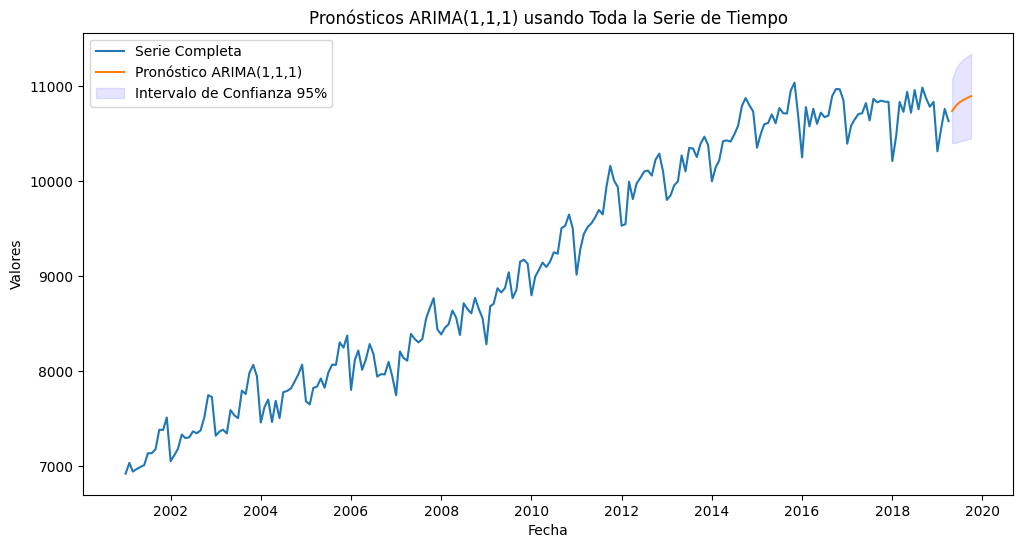

                Fecha  Predicciones
2019-05-01 2019-04-30  10738.380708
2019-06-01 2019-05-31  10795.155020
2019-07-01 2019-06-30  10830.032924
2019-08-01 2019-07-31  10855.240231
2019-09-01 2019-08-31  10876.176497
2019-10-01 2019-09-30  10895.226449


In [28]:
# Suponemos que full_series es la serie temporal con un índice de fechas
full_series = data["Ocupados"]

# Horizonte de predicción
h = 6  

# Realizar las predicciones usando el modelo ajustado en toda la serie
y_forec, conf_int = model.predict(h, return_conf_int=True, alpha=0.05)

# Preparar DataFrame para predicciones y intervalos de confianza
preds = pd.DataFrame(np.column_stack([y_forec, conf_int[:, 0], conf_int[:, 1]]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']

# Preparar el eje X para las predicciones
x_for = np.arange(len(full_series), len(full_series) + h)

# Graficar
fig = plt.figure(figsize=(12, 6))
plt.plot(full_series.index, full_series, label="Serie Completa")
plt.plot(pd.date_range(start=full_series.index[-1] + pd.DateOffset(1), periods=h, freq='M'), y_forec, label="Pronóstico ARIMA(1,1,1)")
plt.fill_between(pd.date_range(start=full_series.index[-1] + pd.DateOffset(1), periods=h, freq='M'), conf_int[:, 0], conf_int[:, 1], color='blue', alpha=0.1, label='Intervalo de Confianza 95%')
plt.legend()
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.title("Pronósticos ARIMA(1,1,1) usando Toda la Serie de Tiempo")
plt.show()

# Crear una tabla para mostrar predicciones y valores reales
# Generar las fechas para el horizonte de predicción
forecast_dates = pd.date_range(start=full_series.index[-1] + pd.DateOffset(1), periods=h, freq='M')  # Ajusta 'freq' según la frecuencia de los datos

# Crear la tabla de predicciones
forecast_table = pd.DataFrame({
    'Fecha': forecast_dates,
    'Predicciones': y_forec
})

print(forecast_table)


## **6. Validación de los supuestos sobre los residuales del mejor modelo**

Debido al proceso de diferenciación realizado en la serie temporal, donde se realiza una resta entre las observaciones consecutivas, el primer valor del residuo de la serie diferenciada no será tomado en cuenta. Esto es porque el primer residuo se basa en la diferencia entre el primer y el segundo dato, y puede no ser representativo del patrón general de la serie. Este primer residuo puede estar influenciado por la falta de un dato previo, lo que lo hace menos confiable para evaluar el comportamiento general del modelo.

In [29]:
residuals = model.resid().iloc[1:]

print(residuals)

mes
2001-02-01    160.444989
2001-03-01    -38.368467
2001-04-01     28.648610
2001-05-01     22.307146
2001-06-01     18.519912
                 ...    
2018-12-01    -26.574700
2019-01-01   -576.628082
2019-02-01    -32.158735
2019-03-01     57.865081
2019-04-01   -178.378822
Length: 219, dtype: float64


### **Normalidad (No se cumple)**

#### Análisis Gráfico

In [ ]:
# Convertir los residuos a un array unidimensional
residuals = residuals.to_numpy()  # Alternativamente: residuals.values


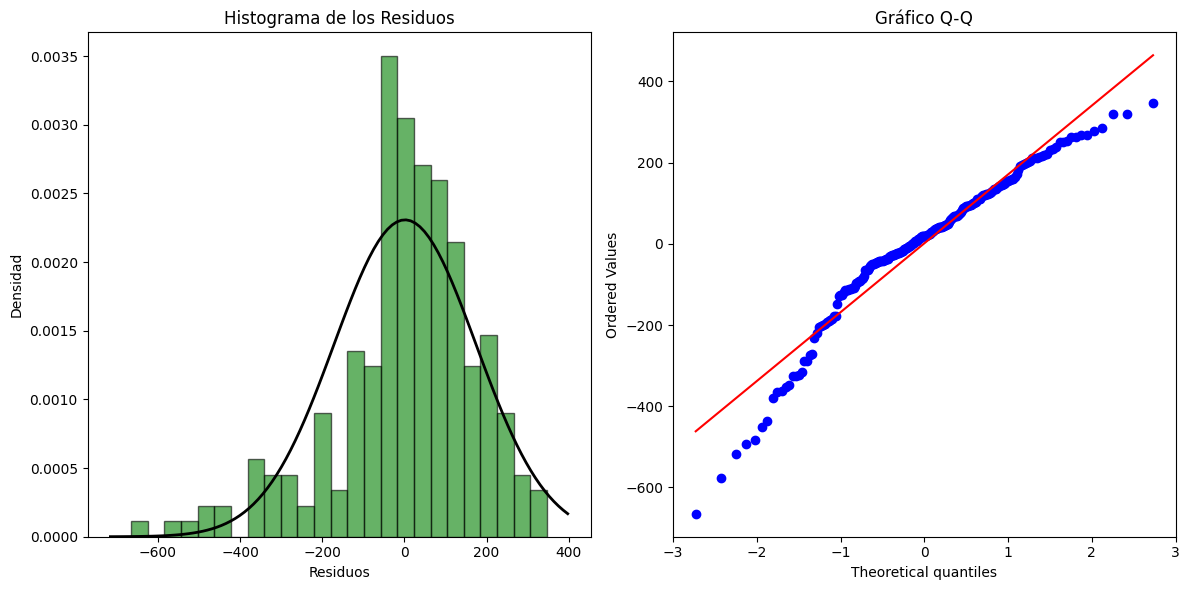

In [35]:
# Calcular parámetros de la distribución normal ajustada
mu, std = stats.norm.fit(residuals)

# Crear subgráficas
plt.figure(figsize=(12, 6))

# Histograma de los residuos con ajuste de línea normal
plt.subplot(121)
plt.hist(residuals, bins=25, edgecolor='k', density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()  # Limites del histograma
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Histograma de los Residuos")
plt.xlabel("Residuos")
plt.ylabel("Densidad")

# Gráfico Q-Q
plt.subplot(122)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Gráfico Q-Q")

# Mostrar gráficos
plt.tight_layout()
plt.show()


#### **Prueba Shapiro - Wilk**

**Hipótesis de la Prueba de Shapiro-Wilk**

- Hipótesis Nula (H0): Los datos provienen de una distribución normal. En otras palabras, los residuos siguen una distribución normal.
- Hipótesis Alternativa (H1): Los datos no provienen de una distribución normal. Es decir, los residuos no siguen una distribución normal.

In [38]:
from scipy.stats import shapiro

# Aplicar la prueba de Shapiro-Wilk para evaluar la normalidad de los residuos
stat, p = shapiro(residuals)

# Mostrar los resultados de la prueba con el valor p completo
print(f'Estadístico de Shapiro-Wilk: {stat:.4f}')
print(f'Valor p: {p:.10f}')  # Mostrar el valor p con mayor precisión

# Evaluar y reportar la normalidad de los residuos basado en el valor p
if p > 0.05:
    print("No se rechaza la hipótesis nula: Los residuos parecen seguir una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: Los residuos no siguen una distribución normal.")


Estadístico de Shapiro-Wilk: 0.9435
Valor p: 0.0000001602
Se rechaza la hipótesis nula: Los residuos no siguen una distribución normal.


### **Autocorrelación (No hay presencia de AC)**

#### **Prueba Ljung-Box**

**Hipótesis de la Prueba**

- Hipótesis Nula (H0): Los residuos están autocorrelacionados (no hay autocorrelación significativa). Esto implica que los residuos son independientes y no muestran patrones de autocorrelación en los rezagos especificados.
- Hipótesis Alternativa (H1): Los residuos están autocorrelacionados (hay autocorrelación significativa). Esto sugiere que los residuos no son completamente aleatorios y podrían seguir algún patrón en los rezagos especificados.

In [40]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Aplicar la prueba de Ljung-Box a los residuos
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)

# Extraer el valor p de la prueba
p_value = lb_test['lb_pvalue'].iloc[0]

# Mostrar el resultado de la prueba con el valor p completo
print(f'Valor p de la prueba de Ljung-Box: {p_value:.10f}')  # Mostrar el valor p con mayor precisión

# Evaluar y reportar la presencia de autocorrelación basado en el valor p
if p_value > 0.05:
    print("No se rechaza la hipótesis nula: No hay evidencia suficiente de autocorrelación en los residuos.")
else:
    print("Se rechaza la hipótesis nula: Hay evidencia de autocorrelación en los residuos.")


Valor p de la prueba de Ljung-Box: 0.5116438138
No se rechaza la hipótesis nula: No hay evidencia suficiente de autocorrelación en los residuos.


### **Heterocedasiticidad (No hay presencia)**

### Análisis Gráfico

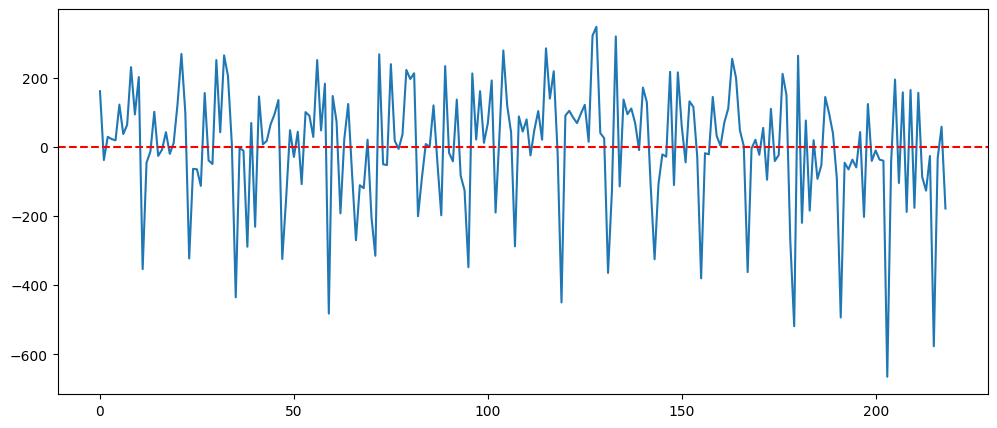

In [45]:
fig = plt.figure(figsize=(12, 5))
plt.plot(residuals,label="Residuales del Modelo")
plt.axhline(y=0, color='red', linestyle='--')

#### **Prueba ARCH**

**Hipótesis de la Prueba**

- Hipótesis Nula (H0): Los residuos no presentan heterocedasticidad condicional. En otras palabras, la varianza de los residuos es constante a lo largo del tiempo (es decir, la serie no sigue un modelo ARCH).
- Hipótesis Alternativa (H1): Los residuos presentan heterocedasticidad condicional. Es decir, la varianza de los residuos varía a lo largo del tiempo (es decir, la serie sigue un modelo ARCH).

In [46]:
from statsmodels.stats.diagnostic import het_arch

# Prueba de ARCH para heterocedasticidad
arch_test = het_arch(residuals)

# Extraer el estadístico de prueba y el valor p
arch_statistic = arch_test[0]
arch_p_value = arch_test[1]

# Mostrar los resultados
print(f'ARCH Test Statistic: {arch_statistic}')
print(f'p-value: {arch_p_value:.10f}')  # Mostrar el valor p con mayor precisión

# Evaluar y reportar la heterocedasticidad basada en el valor p
if arch_p_value > 0.05:
    print("No se rechaza la hipótesis nula: Los residuos no presentan heterocedasticidad.")
else:
    print("Se rechaza la hipótesis nula: Los residuos presentan heterocedasticidad.")


ARCH Test Statistic: 15.244648429533031
p-value: 0.1233937241
No se rechaza la hipótesis nula: Los residuos no presentan heterocedasticidad.


## **7. Boostrap**

El bootstrap es una técnica empleada en el análisis de series de tiempo cuando no hay cumplimiento del supuesto de normalidad, permite realizar mejores inferencias debido a que no requiere que los residuos sigan una distribución normal. En su defecto, se basa en el remuestreo de los datos observados. 

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


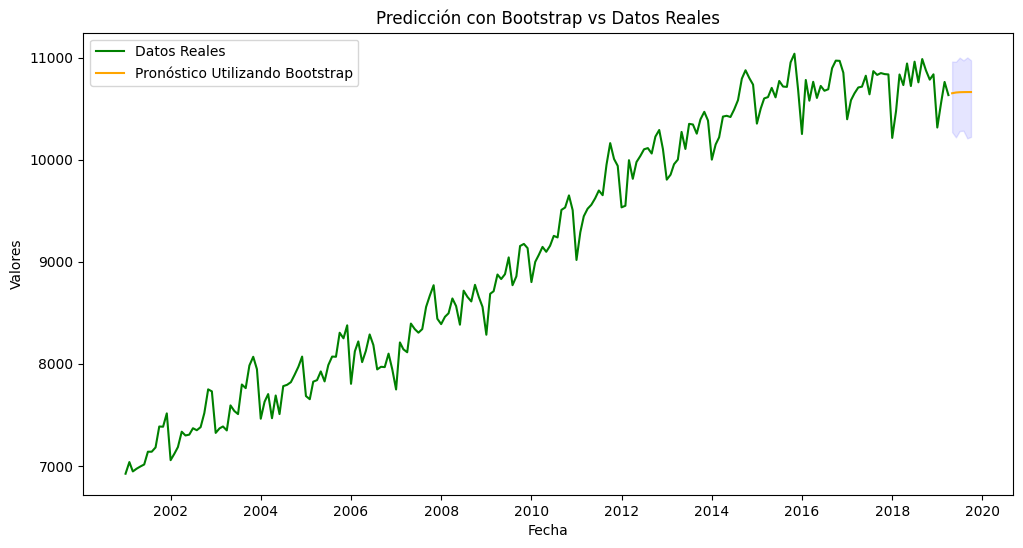

In [51]:
# Ajustar el modelo ARIMA(1,1,1) al dataset completo
model = ARIMA(data["Ocupados"], order=(1,1,1)).fit()

# Parámetros del bootstrap
h = 6  # Horizonte de predicción
n_bootstrap = 1000  # Número de muestras bootstrap

# Realizar el pronóstico puntual y obtener los residuos
forecast = model.get_forecast(steps=h)
residuals = model.resid

# Inicializar un array para almacenar las muestras bootstrap
bootstrap_forecasts = np.zeros((n_bootstrap, h))

# Simulación
for i in range(n_bootstrap):
    # Muestrear con reemplazo de los residuos
    sampled_residuals = np.random.choice(residuals, size=h, replace=True)
    
    # Generar la predicción de bootstrap sumando los residuos simulados
    bootstrap_forecasts[i, :] = forecast.predicted_mean + sampled_residuals

# Calcular los intervalos de confianza de bootstrap
point_forecast = forecast.predicted_mean
lower_bound = np.percentile(bootstrap_forecasts, 2.5, axis=0)
upper_bound = np.percentile(bootstrap_forecasts, 97.5, axis=0)

# Generar el índice temporal para las predicciones (suponiendo datos mensuales)
x_for = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=h, freq='MS')

# Graficar los valores reales y las predicciones bootstrap
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los datos reales
ax.plot(data.index, data["Ocupados"], label="Datos Reales", color='green')

# Graficar las predicciones puntuales
ax.plot(x_for, point_forecast, label="Pronóstico Utilizando Bootstrap", color='orange')

# Agregar la banda de confianza calculada con bootstrap
ax.fill_between(x_for, lower_bound, upper_bound, color='blue', alpha=0.1)

# Ajustar etiquetas y leyenda
ax.set_title("Predicción con Bootstrap vs Datos Reales")
ax.set_xlabel("Fecha")
ax.set_ylabel("Valores")
ax.legend()

# Mostrar la gráfica
plt.show()


In [50]:
#Pronósticos Explícitos

results = pd.DataFrame({
    'Mes': x_for,
    'Pronóstico': point_forecast,
    'Límite Inferior': lower_bound,
    'Límite Superior': upper_bound
})

print(results)

                  Mes    Pronóstico  Límite Inferior  Límite Superior
2019-05-01 2019-05-01  10650.087385     10196.671357     10988.987141
2019-06-01 2019-06-01  10657.294193     10203.940921     10991.978779
2019-07-01 2019-07-01  10660.170154     10220.473219     11008.219001
2019-08-01 2019-08-01  10661.317840     10282.721838     10996.002426
2019-09-01 2019-09-01  10661.775838     10205.912321     10996.460424
2019-10-01 2019-10-01  10661.958607     10222.261671     10996.643193
